### Команды для сборки

Pacbio с помощью Flye, illumina и кросс-сборка с помощью SPAdes

flye --pacbio-raw pacbio_10x.fq.gz --out-dir pacbio_10x --threads 6

flye --pacbio-raw pacbio_20x.fq.gz --out-dir pacbio_20x --threads 6

flye --pacbio-raw pacbio_40x.fq.gz --out-dir pacbio_40x --threads 6

flye --pacbio-raw pacbio_80x.fq.gz --out-dir pacbio_80x --threads 6

spades.py -1 illumina.100x.1.fq.gz -2 illumina.100x.2.fq.gz	-o illumina	-t 6 -m 22

spades.py -1 illumina.100x.1.fq.gz -2 illumina.100x.2.fq.gz --pacbio pacbio_10x.fq.gz -o cross_10 -t 6 -m 22

spades.py -1 illumina.100x.1.fq.gz -2 illumina.100x.2.fq.gz --pacbio pacbio_20x.fq.gz -o cross_20 -t 6 -m 22

spades.py -1 illumina.100x.1.fq.gz -2 illumina.100x.2.fq.gz --pacbio pacbio_40x.fq.gz -o cross_40 -t 6 -m 22

spades.py -1 illumina.100x.1.fq.gz -2 illumina.100x.2.fq.gz --pacbio pacbio_80x.fq.gz -o cross_80 -t 6 -m 22

### QUAST

quast.py -r reference.fasta -m 50 -t 6 illumina/scaffolds.fasta pacbio_10x/assembly.fasta pacbio_20x/assembly.fasta pacbio_40x/assembly.fasta pacbio_80x/assembly.fasta cross_10/scaffolds.fasta cross_20/scaffolds.fasta cross_40/scaffolds.fasta cross_80/scaffolds.fasta

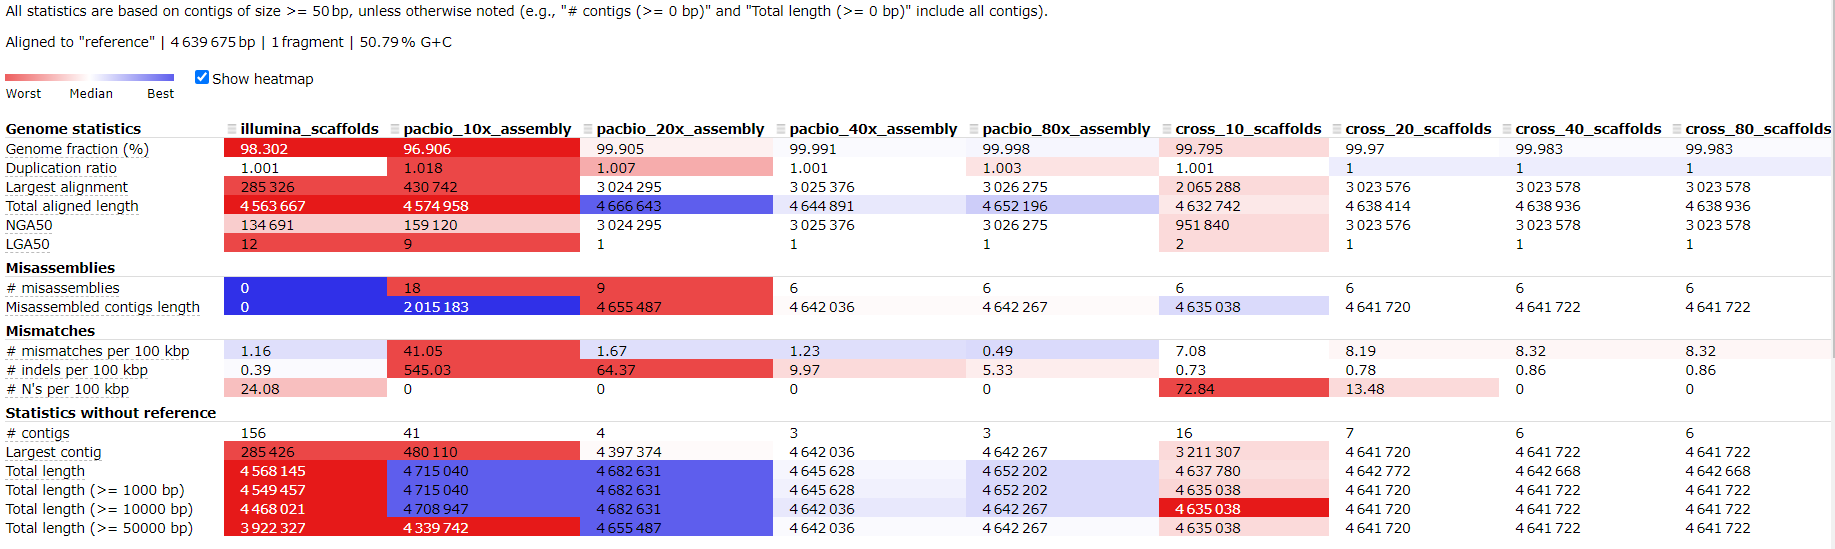

In [2]:
from IPython.display import Image
Image("img_hw6/quast_stats.png")

У illumina гораздо короче контиги и их больше, хуже значения NGA50, LGA50. При этом при сборке коротких ридов нет мизассемблов. Невысокий процент mismatch ошибок, но есть участки N за счет объединения контигов в скаффолды. Инделов практически нет. Осталось непокрыто порядка 2% генома

Если использовать только pacbio риды, то надо иметь достаточно большую глубину секвенирования, чтобы обеспечить глубину покрытия и исправления ошибок. При малой глубине покрытия очень много ошибок (как mismatch, так и инделов). Также сборка из длинных ридов приводит к образованию мизассемблов. 

Глубокое покрытие pacbio делать дорого. Можно сделать библиотеку коротких прочтений illumina и неглубокое покрытие pacbio для закрытия гэпов. Это помогает объединить короткие контиги от illumina в более длинные и закрыть сложные для сборки участки. При кросс-сборке лучшее значение duplication ratio = 1.

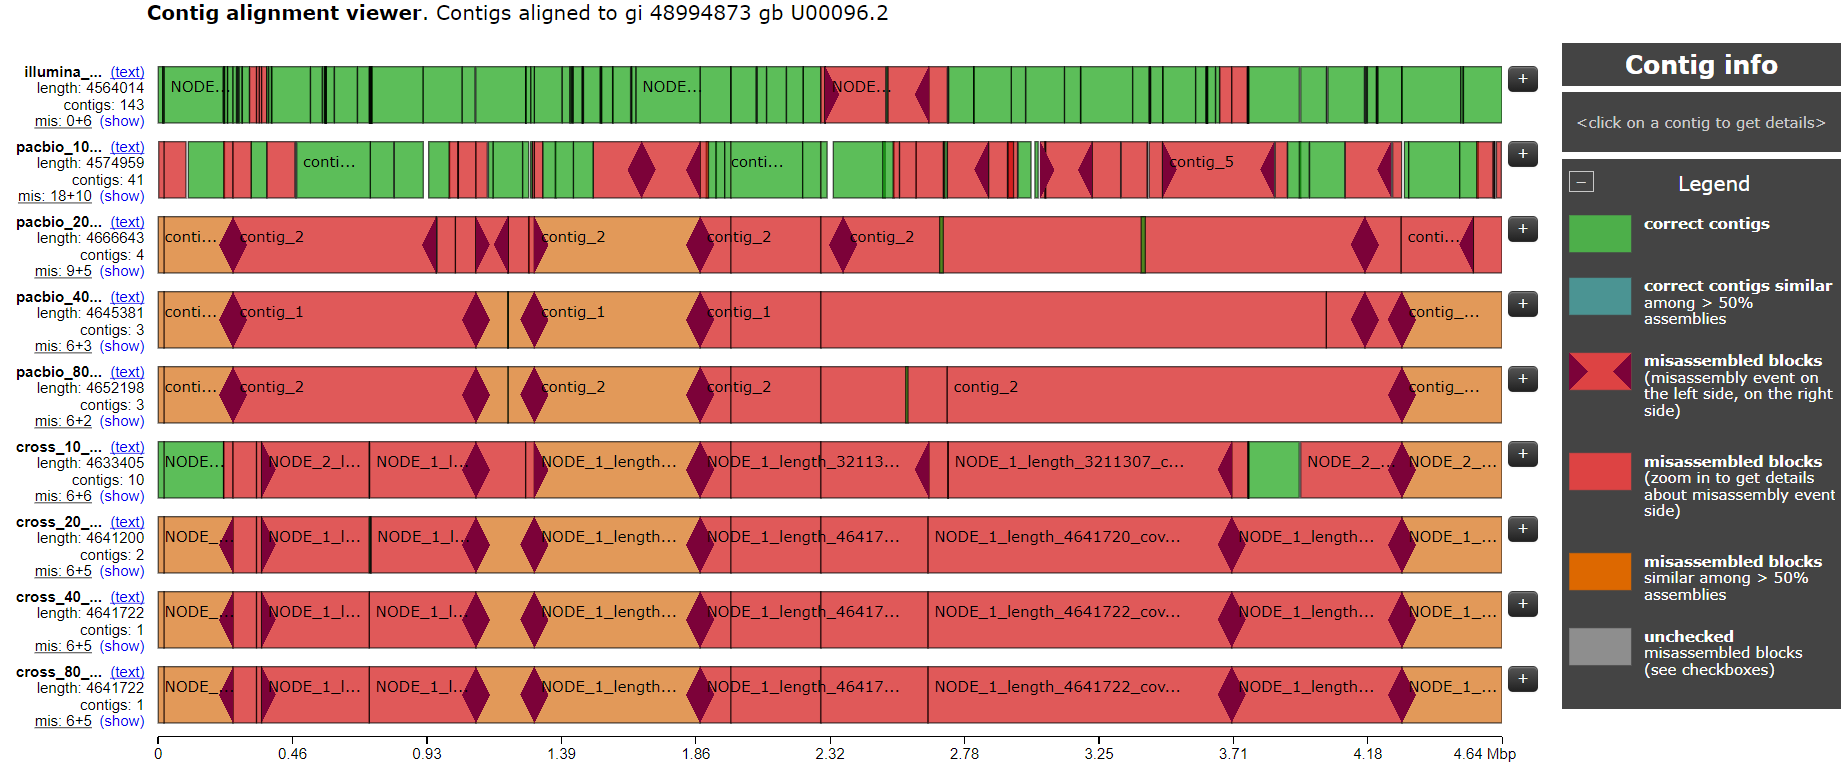

In [3]:
Image("img_hw6/quast_icarus.png")